In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize

# Load original model

In [3]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 18min 17s
Wall time: 4min 2s
CPU times: total: 53.7 s
Wall time: 29.6 s


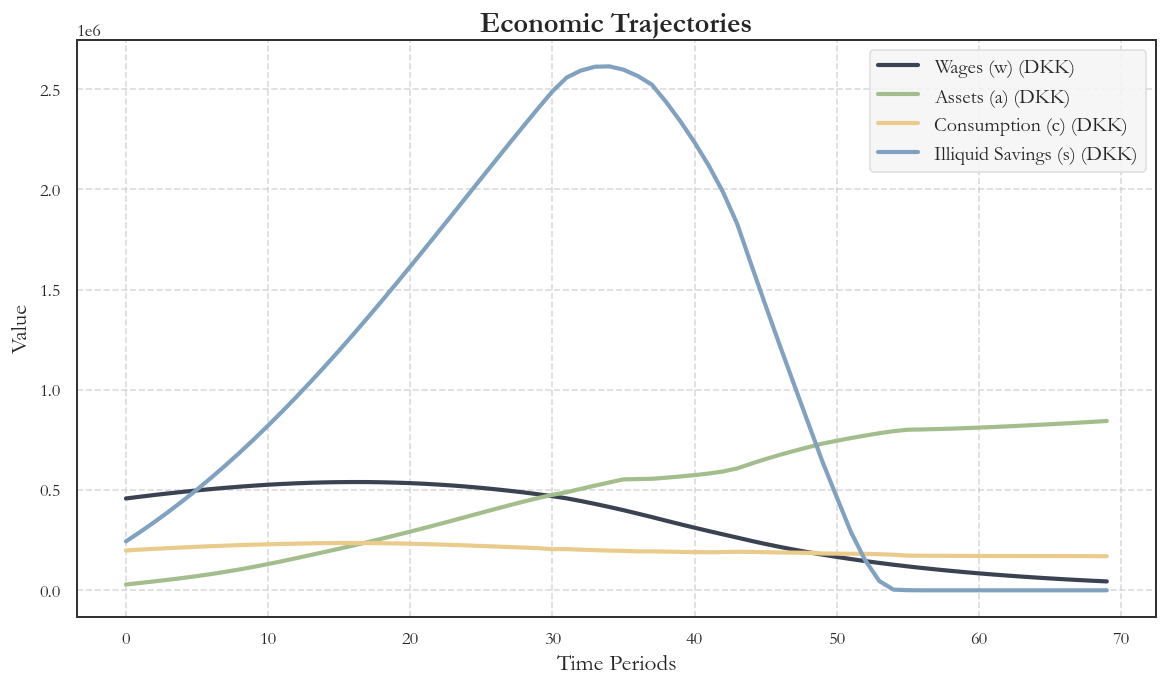

In [4]:
time = np.arange(par.T)
data_dict_basic = {
    "Wages (w)": {"data": np.mean(model.sim.w[:], axis=0), "unit": "DKK"},
    "Assets (a)": {"data": np.mean(model.sim.a[:], axis=0), "unit": "DKK"},
    "Consumption (c)": {"data": np.mean(model.sim.c[:], axis=0), "unit": "DKK"},
    "Illiquid Savings (s)": {"data": np.mean(model.sim.s[:], axis=0), "unit": "DKK"},
}

plot_simulation_one_graph(data_dict_basic, time, title="Economic Trajectories")

# Counter factual

In [98]:
# Change parameters and re-solve
theta = [36]
theta_names = ['retirement_age']

# theta = [0.03]
# theta_names = ['r_a']

og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


c:\Users\Peter\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:83: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:91: RuntimeWarning: divide by zero encountered in divide
  extensive_margin_age = (sim_new_ex-sim_og_ex)/par_og.simN
c:\Users\Peter\Design_retirement\WelfareMeasures.py:91: RuntimeWarning: invalid value encountered in divide
  extensive_margin_age = (sim_new_ex-sim_og_ex)/par_og.simN
c:\Users\Peter\Design_retirement\WelfareMeasures.py:98: RuntimeWarning: divide by zero encountered in divide
  total_margin_og = np.sum(sim_og.h, axis=0)
c:\Users\Peter\Design_retirement\WelfareMeasures.py:98: RuntimeWarning: invalid value encountered in divide
  total_margin_og = np.sum(sim_og.h, axis=0)


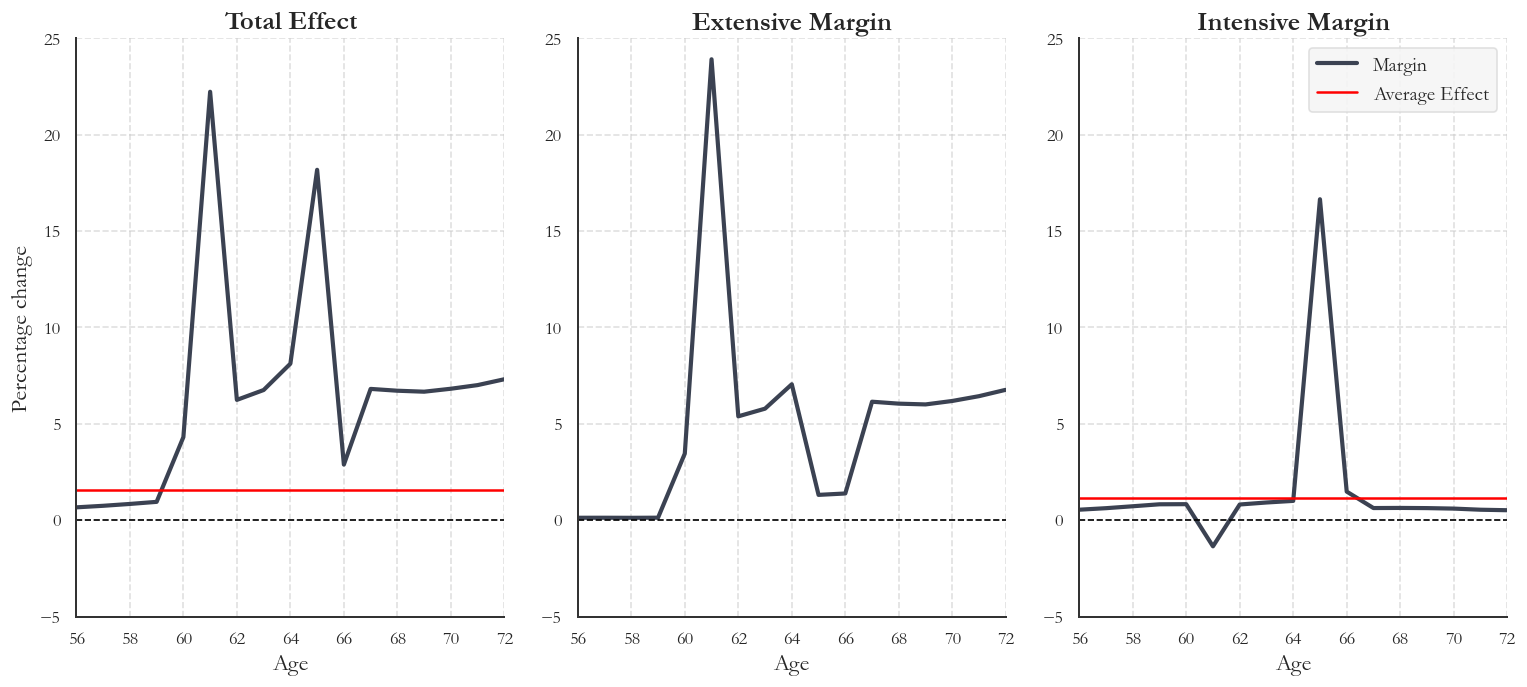

0.015386974237850692


In [99]:
# Compare models 
# consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, total_margin, intensive_margin_age, extensive_margin_age, total_margin_age  = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    total_age=total_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    avg_total=total_margin,
    age_start=par.start_age,
    title_prefix="",
    save_title="counterfactual_labor_margins_total.png"
)

print(total_margin)

In [100]:
# Change parameters and re-solve
theta = [36, 6, 1]
theta_names = ['retirement_age', 'range', 'early_benefits_lag']

# theta = [0.03]
# theta_names = ['r_a']

og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


c:\Users\Peter\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:83: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:91: RuntimeWarning: invalid value encountered in divide
  extensive_margin_age = (sim_new_ex-sim_og_ex)/par_og.simN
c:\Users\Peter\Design_retirement\WelfareMeasures.py:98: RuntimeWarning: invalid value encountered in divide
  total_margin_og = np.sum(sim_og.h, axis=0)


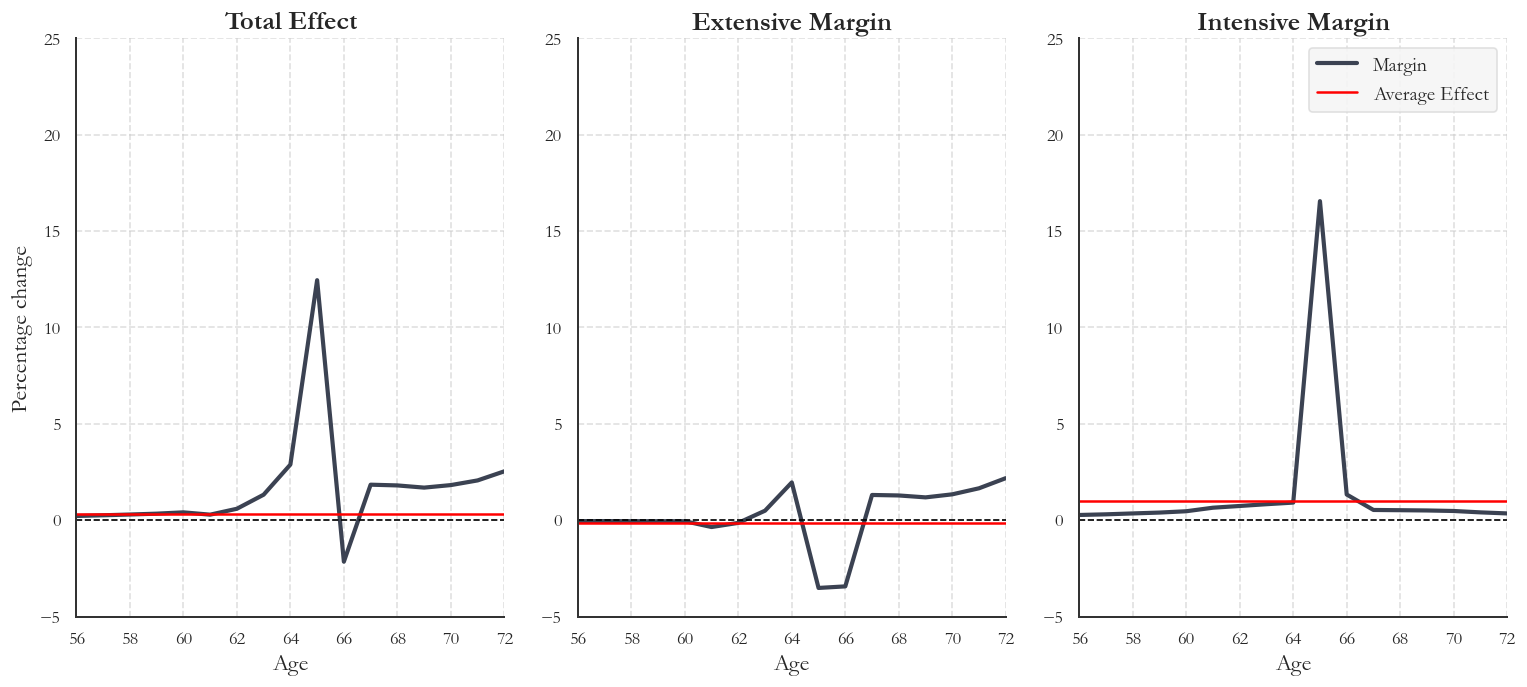

0.0032133438965749536


In [101]:
# Compare models 
# consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, total_margin, intensive_margin_age, extensive_margin_age, total_margin_age  = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    total_age=total_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    avg_total=total_margin,
    age_start=par.start_age,
    title_prefix="",
    save_title="counterfactual_labor_margins_ret.png"
)

print(total_margin)

In [102]:
# Change parameters and re-solve
theta = [4, 0]
theta_names = ['range', 'early_benefits_lag']

# theta = [0.03]
# theta_names = ['r_a']

og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


Expected welfare  before parameter changes: -30.99474485573821
Expected welfare after parameter changes: -30.991702971319715
Consumption at every age before the policy change must change with 0.1 pct. to keep the same utility, and analytically: 0.1 pct.


c:\Users\Peter\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:83: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:91: RuntimeWarning: invalid value encountered in divide
  extensive_margin_age = (sim_new_ex-sim_og_ex)/par_og.simN
c:\Users\Peter\Design_retirement\WelfareMeasures.py:98: RuntimeWarning: invalid value encountered in divide
  total_margin_og = np.sum(sim_og.h, axis=0)


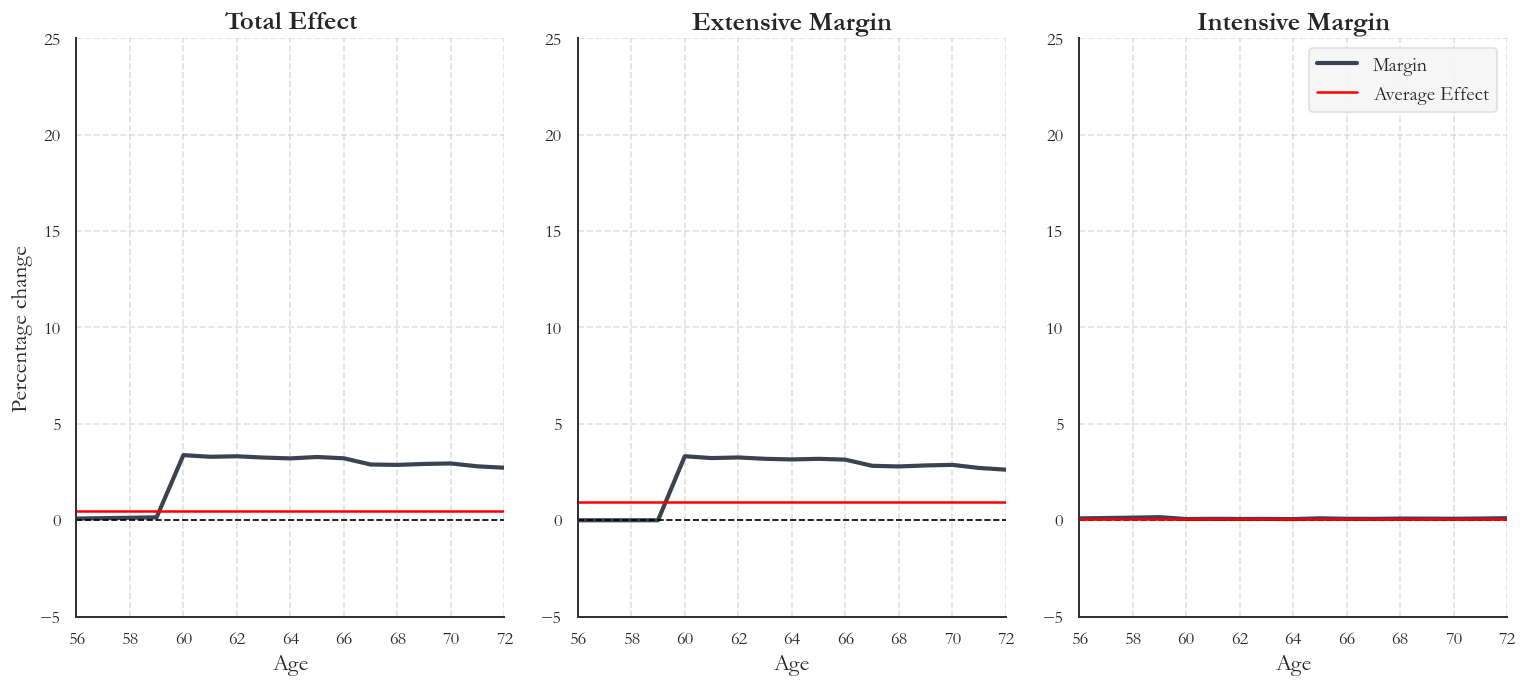

0.004468456738094463


In [103]:
# Compare models 
consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, total_margin, intensive_margin_age, extensive_margin_age, total_margin_age  = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    total_age=total_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    avg_total=total_margin,
    age_start=par.start_age,
    title_prefix="",
    save_title="counterfactual_labor_margins_first.png"
)

print(total_margin)

In [104]:
# Change parameters and re-solve
theta = [2]
theta_names = ['early_benefits_lag']

# theta = [0.03]
# theta_names = ['r_a']

og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


Expected welfare  before parameter changes: -30.99474485573821
Expected welfare after parameter changes: -30.99991243981968
Consumption at every age before the policy change must change with -0.1 pct. to keep the same utility, and analytically: -0.1 pct.


c:\Users\Peter\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:83: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average
c:\Users\Peter\Design_retirement\WelfareMeasures.py:91: RuntimeWarning: invalid value encountered in divide
  extensive_margin_age = (sim_new_ex-sim_og_ex)/par_og.simN
c:\Users\Peter\Design_retirement\WelfareMeasures.py:98: RuntimeWarning: invalid value encountered in divide
  total_margin_og = np.sum(sim_og.h, axis=0)


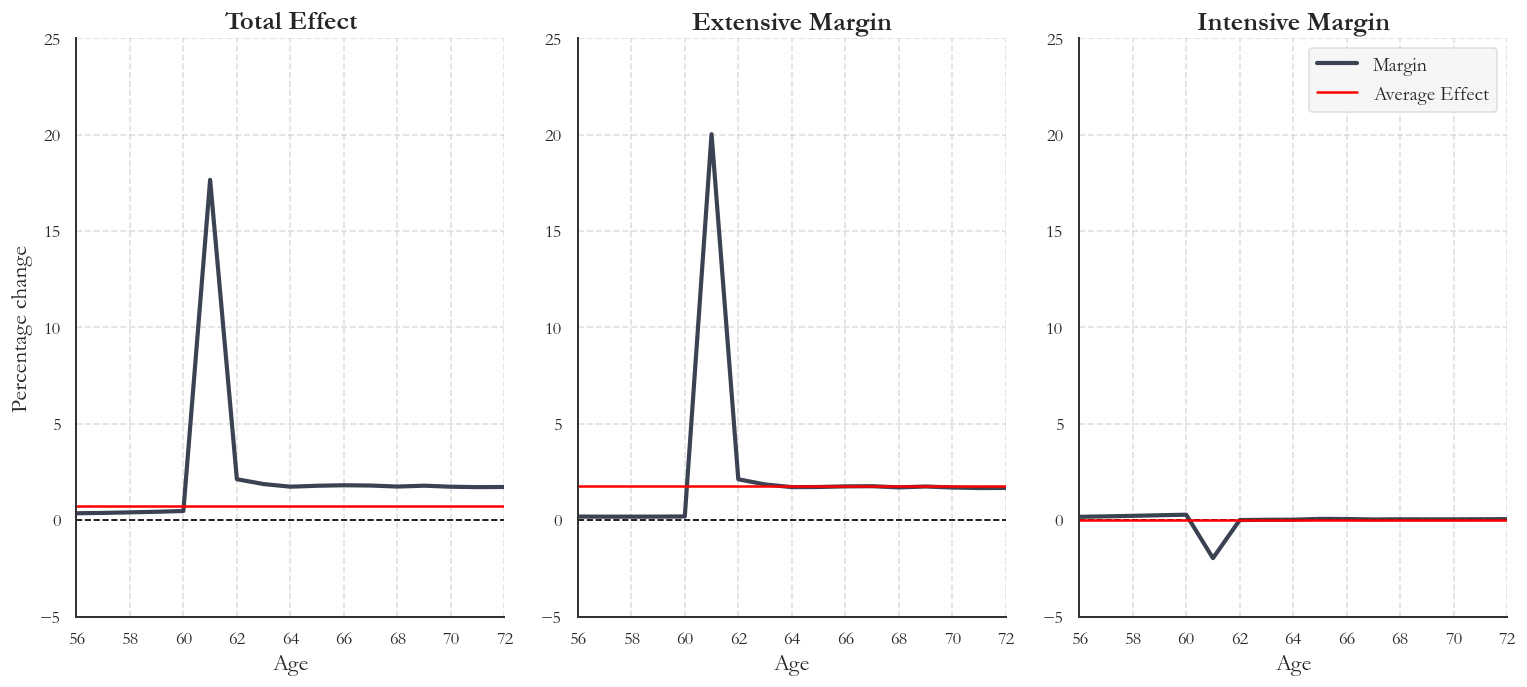

0.007160257807321711


In [105]:
# Compare models 
consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, total_margin, intensive_margin_age, extensive_margin_age, total_margin_age  = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    total_age=total_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    avg_total=total_margin,
    age_start=par.start_age,
    title_prefix="",
    save_title="counterfactual_labor_margins_early.png"
)

print(total_margin)

In [106]:
0.0032133438965749536+0.007160257807321711+0.004468456738094463

0.014842058441991128